## Tutorial 2: Machine Learning and Programming in Python

The following tutorial describes the main elements of linear regressions, regularization techniques and cross-validation by predicting the housing prices in Boston. In order to implement these techniques, the "Boston Housing Dataset" is included. The dataset is available from different sources like GitHub, Kaggle and Sklearn. The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

The data contains the following variables:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10,000 US Dollars
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's


In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt #For the upcoming plots

Before starting the analysis, one has to prepare the data. This is done via the following code:

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load the dataset and set the column names
boston_housing = pd.read_csv('boston_house_prices.csv', skiprows=1, names=column_names)

#Delete first row, due to the inclusion of variable description in the first row
boston_housing = boston_housing.drop(index=0)

#Converting all columns to numeric
boston_housing = boston_housing.apply(pd.to_numeric, errors='coerce')

#Check for NaNs
print("Any NaNs?",boston_housing.isna().any().any())


Any NaNs? False


### Task 1)

a) Get a first insight into the data.

   - How many observations are present?
   - Which types do the variables have?
   - Print out a summary statistic including the min, max, quantiles and the median

In [3]:
print(boston_housing.info())

print(boston_housing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

The dataset comprises 506 observations detailing housing prices in Boston. You can examine the types of variables using the "info()" command. These types consist of integers and floats. Lastly, details such as the minimum, maximum, and other statistical summaries can be obtained through the "describe()" command.


b) Implement the training and test set. The training set should countain 70% of the overall data. The remaining 30% are for the test data.
   - Use MEDV as your depended variable
   - All remaining variables are used as the independent variables (Remember: We want to predict the median value of owner-occupied homes)

(Hint: Set a "random_state" in order to reproduce your training and test set.)

In [4]:
from sklearn.model_selection import train_test_split

ind_var = boston_housing.drop('MEDV', axis=1) #Drop independent Variables

dep_var = boston_housing['MEDV']

X_train, X_test, y_train, y_test = train_test_split(ind_var, dep_var, test_size=0.3, random_state =10)



c) Train and test a linear regression.
   - Show your results in a suitable table
   - How can your model be validated? Compare your validation metrics between the training and test set.

(Hint: In order to implement a linear regression model use "from sklearn.linear_model import LinearRegression".)

In [5]:
from sklearn.linear_model import LinearRegression #Linear regression
from sklearn.metrics import mean_squared_error, r2_score #Evaluation metrics

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients and intercept
coefficients = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['Coefficients'])
intercept = model.intercept_
coefficients.loc['Intercept', 'Coefficients'] = intercept

# Display the coefficients
print("Coefficients and Intercept from Training:")
print(coefficients)

# Prediction and evaluation
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate the Mean Squared Error and R2 Score
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

# Calculate the Adjusted R2 Score
n_test = len(y_test)
n_train = len(y_train)
p = X_train.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

#Calculate the RMSE
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

# Display evaluation metrics
print("\nTraining Set Evaluation:")
print("Mean Squared Error:", mse_train)
print("Training Set RMSE:", rmse_train)
print("R2 Score:", r2_train)
print("Adjusted R2 Score:", adjusted_r2_train)

print("\nTest Set Evaluation:")
print("Mean Squared Error:", mse_test)
print("Test Set RMSE:", rmse_test)
print("R2 Score:", r2_test)
print("Adjusted R2 Score:", adjusted_r2_test)



Coefficients and Intercept from Training:
           Coefficients
CRIM          -0.153776
ZN             0.065016
INDUS         -0.024260
CHAS           1.622033
NOX          -15.299931
RM             3.351967
AGE            0.011326
DIS           -1.548109
RAD            0.302642
TAX           -0.012232
PTRATIO       -0.811539
B              0.012950
LSTAT         -0.544862
Intercept     34.244837

Training Set Evaluation:
Mean Squared Error: 19.45968013480259
Training Set RMSE: 4.411312745068365
R2 Score: 0.7495400632086622
Adjusted R2 Score: 0.7399636538607581

Test Set Evaluation:
Mean Squared Error: 29.326596526123172
Test Set RMSE: 5.415403634644713
R2 Score: 0.6996255772983122
Adjusted R2 Score: 0.6713294360293126


The model can be validated via the following metrics:
- Mean Squared Error (MSE)
- R-squared
- Adjusted R-squared

When comparing metrics between the training and test sets, it is typical to observe a larger Mean Squared Error (MSE) in the test set compared to the training set. This is expected because the model is trained on the training set, learning from it to estimate its coefficients. Then, the model is evaluated on the test set to determine its performance on unseen data. Generally, models tend to perform better on the training set than on the test set. The same holds for the R^2 and the adjusted R^2.


d) Include the ridge penalization term.
   - Implement a ridge regression that includes alpha = 1.
   - Does the model improve in comparison to task c? Explain
   - Try out different tuning parameters. What happens when alpha increases or decreases? 


(Hint: Use a large grid for the hyperparameter values. E.g. from 0 to 100.)

In [6]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)  # alpha is the regularization strength; larger values specify stronger regularization.
model.fit(X_train, y_train)

# Coefficients and intercept
coefficients = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['Coefficients'])
intercept = model.intercept_
coefficients.loc['Intercept', 'Coefficients'] = intercept

# Display the coefficients
print("Coefficients and Intercept from Training:")
print(coefficients)

# Prediction and evaluation
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate the Mean Squared Error and R2 Score
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

# Calculate the Adjusted R2 Score
n_test = len(y_test)
n_train = len(y_train)
p = X_train.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

# Calculate the RMSE
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

# Display evaluation metrics
print("\nTraining Set Evaluation:")
print("Mean Squared Error:", mse_train)
print("Training Set RMSE:", rmse_train)
print("R2 Score:", r2_train)
print("Adjusted R2 Score:", adjusted_r2_train)

print("\nTest Set Evaluation:")
print("Mean Squared Error:", mse_test)
print("Test Set RMSE:", rmse_test)
print("R2 Score:", r2_test)
print("Adjusted R2 Score:", adjusted_r2_test)

Coefficients and Intercept from Training:
           Coefficients
CRIM          -0.149604
ZN             0.066055
INDUS         -0.051107
CHAS           1.510220
NOX           -7.979339
RM             3.403010
AGE            0.004701
DIS           -1.432783
RAD            0.284293
TAX           -0.012716
PTRATIO       -0.730445
B              0.013349
LSTAT         -0.555125
Intercept     29.025439

Training Set Evaluation:
Mean Squared Error: 19.625306786951246
Training Set RMSE: 4.430045912510529
R2 Score: 0.7474083302849579
Adjusted R2 Score: 0.7377504135017356

Test Set Evaluation:
Mean Squared Error: 29.877742783534995
Test Set RMSE: 5.466053675508044
R2 Score: 0.6939805226890328
Adjusted R2 Score: 0.6651526009133619


Comparing the results to task c:
- Variable CRIM decreases marginally from -0.153776 to -0.149604
- Variable NOX reduces substanitially from -15.2999 to -7.7993 and, therefore, reduces its impact on the median housing values.
- The MSE increases marginally in the training and test set.
- The R^2 and the adjusted R^2 decreases marginally.

It follows that the inclusion of the ridge penalty does decrease the models performance marginally.

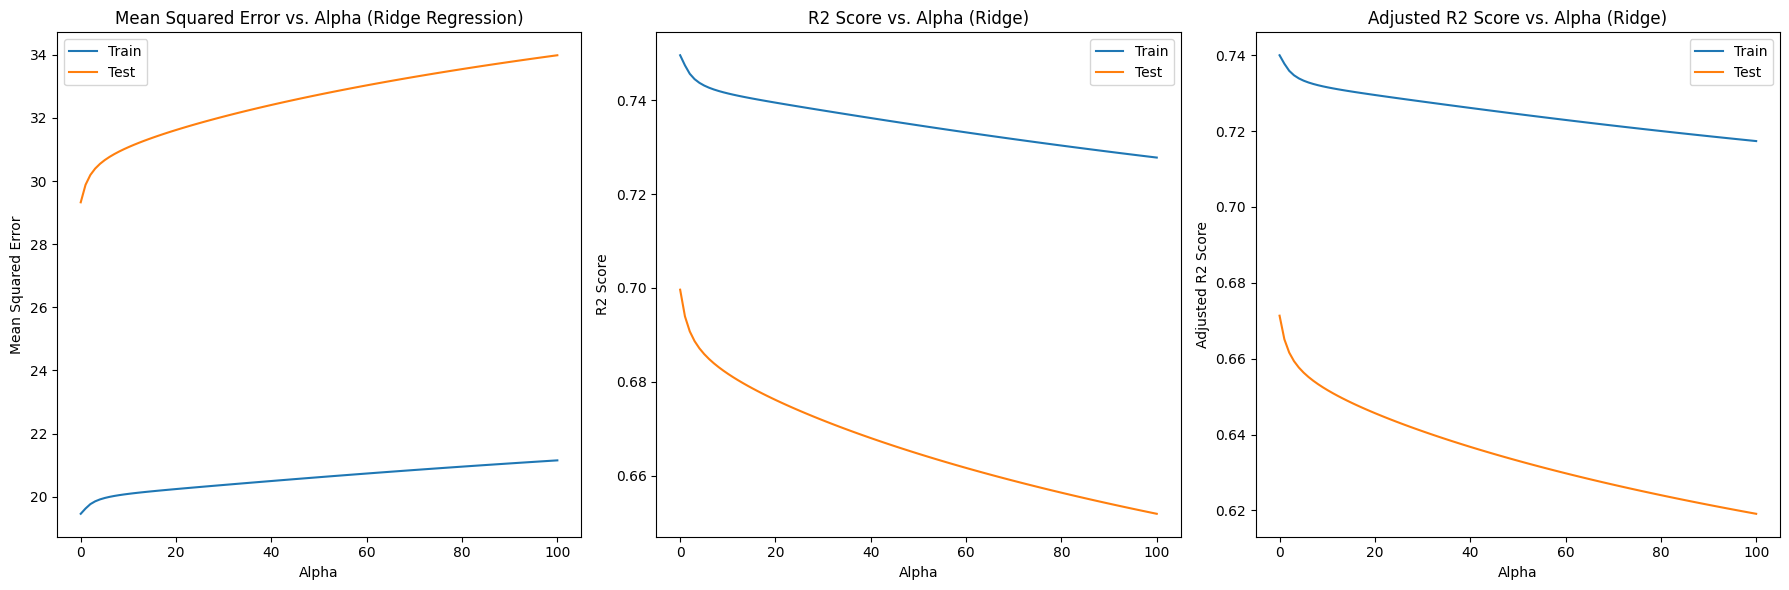

In [7]:
# Define a range of alpha values to explore
alphas = np.linspace(0, 100, 100)

# Lists to store evaluation metrics
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []
adj_r2_train_list = []
adj_r2_test_list = []

# Iterate over each alpha value
for alpha in alphas:
    # Create and fit the Ridge model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Calculate Adjusted R2 Score
    adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    
    # Append metrics to lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    adj_r2_train_list.append(adj_r2_train)
    adj_r2_test_list.append(adj_r2_test)

# Plot the results
plt.figure(figsize=(18, 6))

# Plot Mean Squared Error
plt.subplot(1, 3, 1)
plt.plot(alphas, mse_train_list, label='Train')
plt.plot(alphas, mse_test_list, label='Test')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha (Ridge Regression)')
plt.legend()

# Plot R2 Score
plt.subplot(1, 3, 2)
plt.plot(alphas, r2_train_list, label='Train')
plt.plot(alphas, r2_test_list, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Alpha (Ridge)')
plt.legend()

# Plot Adjusted R2 Score
plt.subplot(1, 3, 3)
plt.plot(alphas, adj_r2_train_list, label='Train')
plt.plot(alphas, adj_r2_test_list, label='Test')
plt.xlabel('Alpha')
plt.ylabel('Adjusted R2 Score')
plt.title('Adjusted R2 Score vs. Alpha (Ridge)')
plt.legend()

plt.tight_layout()
plt.show()

When various values of the hyperparameter alpha are incorporated, it becomes evident that higher alpha values correspond to decreased performance of the model. For instance, the lowest Mean Squared Error (MSE) and highest (adjusted) R^2 are observed when alpha equals 0. From this observation, it can be inferred that the inclusion of ridge penalization does not lead to an improvement compared to the linear model.

e) Include the lasso penalization term.
   - Implement a ridge regression that includes alpha = 1.
   - Does the model improve in comparison to task c? Explain
   - Try out different tuning parameters. What happens when alpha increases or decreases?
   

In [8]:
from sklearn.linear_model import Lasso

# Create and fit the Lasso model
model = Lasso(alpha=1.0)  # alpha is the regularization strength; larger values specify stronger regularization.
model.fit(X_train, y_train)

# Coefficients and intercept
coefficients = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['Coefficients'])
intercept = model.intercept_
coefficients.loc['Intercept', 'Coefficients'] = intercept

# Display the coefficients
print("Coefficients and Intercept from Training:")
print(coefficients)

# Prediction and evaluation
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate the Mean Squared Error and R2 Score
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

# Calculate the Adjusted R2 Score
n_test = len(y_test)
n_train = len(y_train)
p = X_train.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

# Calculate the RMSE
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

# Display evaluation metrics
print("\nTraining Set Evaluation:")
print("Mean Squared Error:", mse_train)
print("Training Set RMSE:", rmse_train)
print("R2 Score:", r2_train)
print("Adjusted R2 Score:", adjusted_r2_train)

print("\nTest Set Evaluation:")
print("Mean Squared Error:", mse_test)
print("Test Set RMSE:", rmse_test)
print("R2 Score:", r2_test)
print("Adjusted R2 Score:", adjusted_r2_test)

Coefficients and Intercept from Training:
           Coefficients
CRIM          -0.099536
ZN             0.075446
INDUS         -0.027237
CHAS           0.000000
NOX           -0.000000
RM             0.226151
AGE            0.031752
DIS           -0.797098
RAD            0.256917
TAX           -0.015165
PTRATIO       -0.558331
B              0.009802
LSTAT         -0.774267
Intercept     41.893768

Training Set Evaluation:
Mean Squared Error: 24.131111360196424
Training Set RMSE: 4.912342756790942
R2 Score: 0.6894154177195142
Adjusted R2 Score: 0.6775401248676133

Test Set Evaluation:
Mean Squared Error: 39.075551380399844
Test Set RMSE: 6.251044023233226
R2 Score: 0.5997729850041569
Adjusted R2 Score: 0.5620704401132441


Comparing the results to task c:
- Variable CRIM reduced significantly
- For CHAS and NOX the coefficients are shrunken to zero. It is therefore concluded that these variables have less predicitive power
- The train and test MSE are significantly larger than in task c)
- (Adj.) R^2 are both smaller in the lasso setting than in task c)
- It is therefore concluded that the model did not improve

/var/folders/ft/5xb22bh56vv94245s10vpqh80000gn/T/ipykernel_49775/1614928025.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3444.3633838600626, tolerance: 2.750430610169492
  model = cd_fast.enet_coordinate_descent(


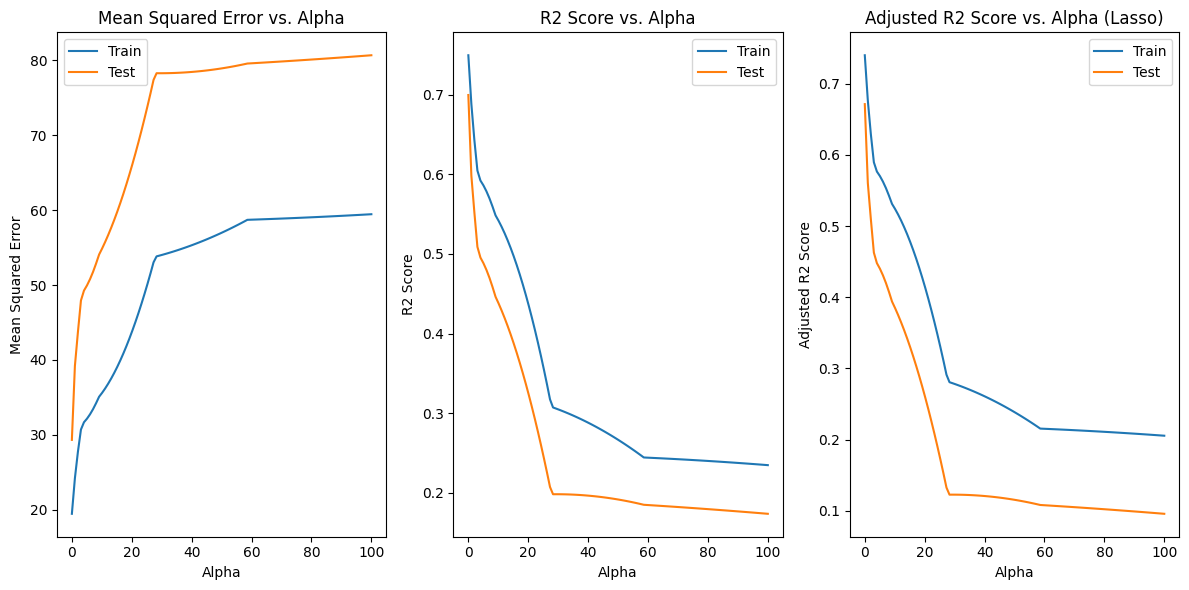

In [9]:
# Define a range of alpha values to explore
alphas = np.linspace(0, 100, num=100)

# Lists to store evaluation metrics
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []
adj_r2_train_list = []
adj_r2_test_list = []

# Iterate over each alpha value
for alpha in alphas:
    # Create and fit the Lasso model
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Calculate adjusted R2 score
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]
    adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1)) / (n_train - p - 1)
    adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1)) / (n_test - p - 1)
    
    # Append metrics to lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    adj_r2_train_list.append(adj_r2_train)
    adj_r2_test_list.append(adj_r2_test)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot Mean Squared Error
plt.subplot(1, 3, 1)
plt.plot(alphas, mse_train_list, label='Train')
plt.plot(alphas, mse_test_list, label='Test')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha')
plt.legend()

# Plot R2 Score
plt.subplot(1, 3, 2)
plt.plot(alphas, r2_train_list, label='Train')
plt.plot(alphas, r2_test_list, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Alpha')
plt.legend()

# Plot Adjusted R2 Score
plt.subplot(1, 3, 3)
plt.plot(alphas, adj_r2_train_list, label='Train')
plt.plot(alphas, adj_r2_test_list, label='Test')
plt.xlabel('Alpha')
plt.ylabel('Adjusted R2 Score')
plt.title('Adjusted R2 Score vs. Alpha (Lasso)')
plt.legend()

plt.tight_layout()
plt.show()

When various values of the hyperparameter alpha are incorporated, it becomes evident that higher alpha values correspond to decreased performance of the model. For instance, the lowest Mean Squared Error (MSE) and highest (adjusted) R^2 are observed when alpha equals 0. From this observation, it can be inferred that the inclusion of lasso penalization does not lead to an improvement compared to the linear model.


Note: Using the $R^2$ metric for evaluating models in this context may not be appropriate. Since Lasso regularization shrinks coefficients towards zero and can lead to sparsity by setting some coefficients exactly to zero, the number of predictors included in the model can vary for different values of the hyperparameter. Consequently, comparing models with different numbers of features using $R^2$ may not provide meaningful insights. 

f) Include the elastic net penalization term.
   - Implement a ridge regression that includes alpha = 1 and the l1 ratio of 0.5.
   - Does the model improve in comparison to task c? Explain
   - Try out different tuning parameters. What happens when alpha increases or decreases?
   

In [10]:
from sklearn.linear_model import ElasticNet

# Create and fit the Elastic Net model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha is the regularization strength; larger values specify stronger regularization.
model.fit(X_train, y_train)

# Coefficients and intercept
coefficients = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['Coefficients'])
intercept = model.intercept_
coefficients.loc['Intercept', 'Coefficients'] = intercept

# Display the coefficients
print("Coefficients and Intercept from Training:")
print(coefficients)

# Prediction and evaluation
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate the Mean Squared Error and R2 Score
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

# Calculate the Adjusted R2 Score
n_test = len(y_test)
n_train = len(y_train)
p = X_train.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

# Calculate the RMSE
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

# Display evaluation metrics
print("\nTraining Set Evaluation:")
print("Mean Squared Error:", mse_train)
print("Training Set RMSE:", rmse_train)
print("R2 Score:", r2_train)
print("Adjusted R2 Score:", adjusted_r2_train)

print("\nTest Set Evaluation:")
print("Mean Squared Error:", mse_test)
print("Test Set RMSE:", rmse_test)
print("R2 Score:", r2_test)
print("Adjusted R2 Score:", adjusted_r2_test)

Coefficients and Intercept from Training:
           Coefficients
CRIM          -0.117031
ZN             0.073407
INDUS         -0.048369
CHAS           0.000000
NOX           -0.000000
RM             0.695259
AGE            0.030161
DIS           -0.840213
RAD            0.280337
TAX           -0.015297
PTRATIO       -0.596701
B              0.010534
LSTAT         -0.739811
Intercept     39.390430

Training Set Evaluation:
Mean Squared Error: 23.083250274650847
Training Set RMSE: 4.804503124637432
R2 Score: 0.7029021358687233
Adjusted R2 Score: 0.6915425116519391

Test Set Evaluation:
Mean Squared Error: 37.452946869860504
Test Set RMSE: 6.119881279065837
R2 Score: 0.6163923323154705
Adjusted R2 Score: 0.5802553781133046


Comparing the results to task c:
- Variable CRIM reduced marginally
- For CHAS and NOX the coefficients are shrunken to zero. It is therefore concluded that these variables have less predicitive power
- The variable RM has a significant reduction in its estimation value 
- The train and test MSE are significantly larger than in task c)
- (Adj.) R^2 are both smaller in the lasso setting than in task c)
- It is therefore concluded that the model did not improve

/var/folders/ft/5xb22bh56vv94245s10vpqh80000gn/T/ipykernel_49775/2448963383.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3444.3633838600626, tolerance: 2.750430610169492
  model = cd_fast.enet_coordinate_descent(


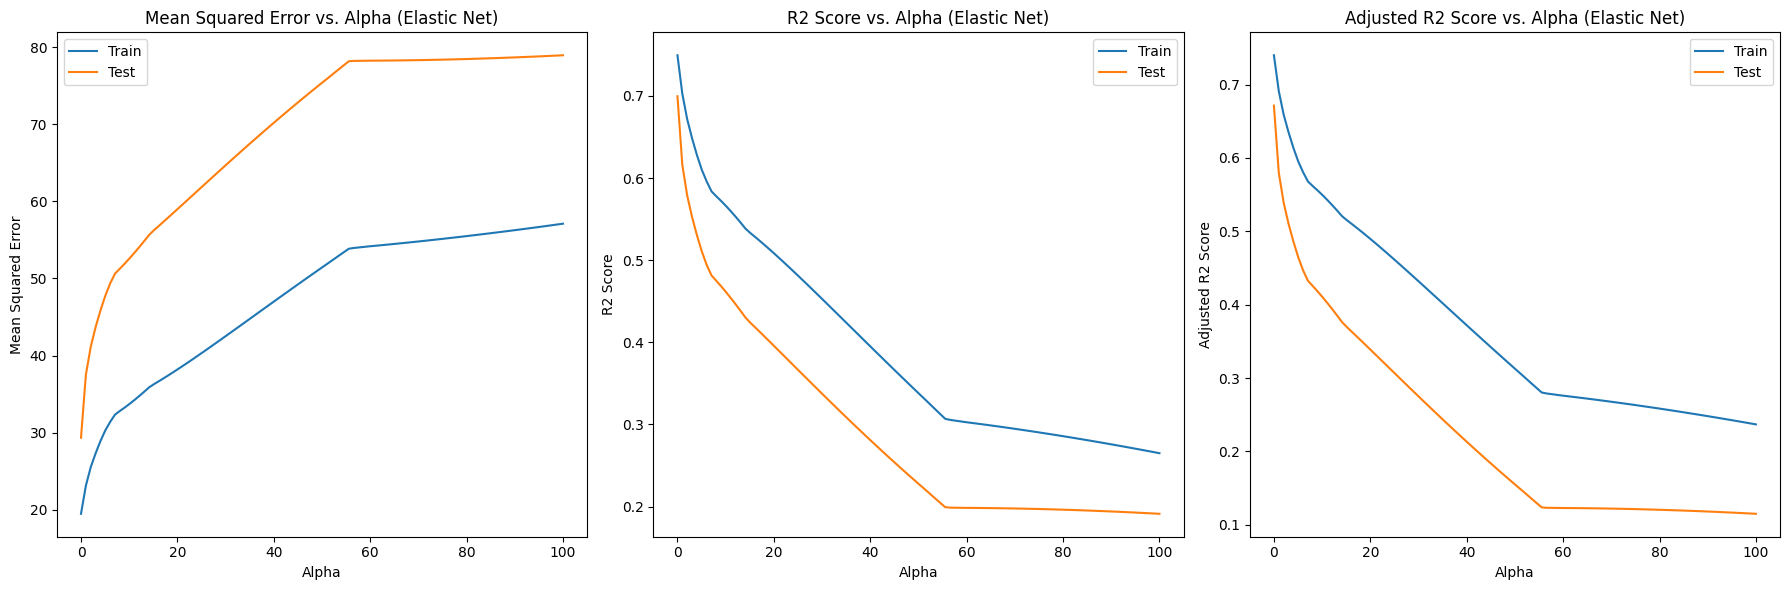

In [11]:
# Define a range of alpha values to explore
alphas = np.linspace(0, 100, num=100)

# Lists to store evaluation metrics
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []
adj_r2_train_list = []
adj_r2_test_list = []

# Iterate over each alpha value
for alpha in alphas:
    # Create and fit the ElasticNet model
    model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio=0.7 means more emphasis on Lasso
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Calculate Adjusted R2 Score
    adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
    adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    
    # Append metrics to lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    adj_r2_train_list.append(adj_r2_train)
    adj_r2_test_list.append(adj_r2_test)

# Plot the results
plt.figure(figsize=(18, 6))

# Plot Mean Squared Error
plt.subplot(1, 3, 1)
plt.plot(alphas, mse_train_list, label='Train')
plt.plot(alphas, mse_test_list, label='Test')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha (Elastic Net)')
plt.legend()

# Plot R2 Score
plt.subplot(1, 3, 2)
plt.plot(alphas, r2_train_list, label='Train')
plt.plot(alphas, r2_test_list, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Alpha (Elastic Net)')
plt.legend()

# Plot Adjusted R2 Score
plt.subplot(1, 3, 3)
plt.plot(alphas, adj_r2_train_list, label='Train')
plt.plot(alphas, adj_r2_test_list, label='Test')
plt.xlabel('Alpha')
plt.ylabel('Adjusted R2 Score')
plt.title('Adjusted R2 Score vs. Alpha (Elastic Net)')
plt.legend()

plt.tight_layout()
plt.show()

When various values of the hyperparameter alpha are incorporated, it becomes evident that higher alpha values correspond to decreased performance of the model. For instance, the lowest Mean Squared Error (MSE) and highest (adjusted) R^2 are observed when alpha equals 0. From this observation, it can be inferred that the inclusion of elastic net penalization does not lead to an improvement compared to the linear model.

Note: Using the $R^2$ metric for evaluating models in this context may not be appropriate. Since elastic net regularization shrinks coefficients towards zero and can lead to sparsity by setting some coefficients exactly to zero, the number of predictors included in the model can vary for different values of the hyperparameter. Consequently, comparing models with different numbers of features using $R^2$ may not provide meaningful insights. 

h) Now include cross-validation to find the optimal tuning paramater for your lasso model.
  - Did your ridge model improve?
  - What is the problem of using cross-validation?

In [12]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to explore
alphas = np.linspace(0, 10, 100)

# Define the Ridge regression model
ridge = Ridge()

# Define the grid of parameters to search
param_grid = {'alpha': alphas}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best Ridge model
best_ridge = grid_search.best_estimator_

# Coefficients and intercept
coefficients = pd.DataFrame(data=best_ridge.coef_, index=X_train.columns, columns=['Coefficients'])
intercept = best_ridge.intercept_
coefficients.loc['Intercept', 'Coefficients'] = intercept

# Display the coefficients
print("Coefficients and Intercept from Training:")
print(coefficients)

# Prediction and evaluation
y_pred_test = best_ridge.predict(X_test)
y_pred_train = best_ridge.predict(X_train)

# Calculate the Mean Squared Error and R2 Score
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

# Calculate the Adjusted R2 Score
n_test = len(y_test)
n_train = len(y_train)
p = X_train.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

# Calculate the RMSE
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

# Display evaluation metrics
print("\nTraining Set Evaluation:")
print("Mean Squared Error:", mse_train)
print("Training Set RMSE:", rmse_train)
print("R2 Score:", r2_train)
print("Adjusted R2 Score:", adjusted_r2_train)

print("\nTest Set Evaluation:")
print("Mean Squared Error:", mse_test)
print("Test Set RMSE:", rmse_test)
print("R2 Score:", r2_test)
print("Adjusted R2 Score:", adjusted_r2_test)

# Get the optimal tuning parameter
optimal_alpha = grid_search.best_params_['alpha']
print("\nOptimal Tuning Parameter (Alpha):", optimal_alpha)

Coefficients and Intercept from Training:
           Coefficients
CRIM          -0.152397
ZN             0.065333
INDUS         -0.033012
CHAS           1.594343
NOX          -12.906896
RM             3.373346
AGE            0.009112
DIS           -1.510402
RAD            0.296480
TAX           -0.012383
PTRATIO       -0.784779
B              0.013085
LSTAT         -0.547889
Intercept     32.500389

Training Set Evaluation:
Mean Squared Error: 19.477335054485003
Training Set RMSE: 4.413313387295877
R2 Score: 0.7493128318237123
Adjusted R2 Score: 0.7397277342169719

Test Set Evaluation:
Mean Squared Error: 29.463347208418188
Test Set RMSE: 5.428015033916007
R2 Score: 0.6982249235534483
Adjusted R2 Score: 0.6697968366418167

Optimal Tuning Parameter (Alpha): 0.20202020202020202


Comparison to ridge in task d)
- The tuning parameter decreased from one to 0.2020
- The MSE does not change significantly
- The same holds for the (adj.) R^2
- Overall, the models performance does not improve due to including cross-validation for the hyperparameter search

i) Now include cross-validation to find the optimal tuning paramater and the penalty ratio for your elastic net model.
  - Did your elastic net model improve?
  - How is the ratio of l1 to l2 penalty? Interpret your results.

In [13]:
# Define a range of alpha values to explore
alphas = np.linspace(0, 10, 100)

# Define a range of l1_ratio values to explore
l1_ratios = np.linspace(0.1, 0.9, 9)

# Create the parameter grid
param_grid = {'alpha': alphas, 'l1_ratio': l1_ratios}

# Create and fit the Elastic Net model with grid search
elastic_net = ElasticNet()
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best Elastic Net model
best_elastic_net = grid_search.best_estimator_

# Coefficients and intercept
coefficients = pd.DataFrame(data=best_elastic_net.coef_, index=X_train.columns, columns=['Coefficients'])
intercept = best_elastic_net.intercept_
coefficients.loc['Intercept', 'Coefficients'] = intercept

# Display the coefficients
print("Coefficients and Intercept from Training:")
print(coefficients)

# Prediction and evaluation
y_pred_test = best_elastic_net.predict(X_test)
y_pred_train = best_elastic_net.predict(X_train)

# Calculate the Mean Squared Error and R2 Score
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

# Calculate the Adjusted R2 Score
n_test = len(y_test)
n_train = len(y_train)
p = X_train.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

# Calculate the RMSE
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

# Display evaluation metrics
print("\nTraining Set Evaluation:")
print("Mean Squared Error:", mse_train)
print("Training Set RMSE:", rmse_train)
print("R2 Score:", r2_train)
print("Adjusted R2 Score:", adjusted_r2_train)

print("\nTest Set Evaluation:")
print("Mean Squared Error:", mse_test)
print("Test Set RMSE:", rmse_test)
print("R2 Score:", r2_test)
print("Adjusted R2 Score:", adjusted_r2_test)

# Print the optimal hyperparameters
print("\nOptimal Hyperparameters:")
print("Optimal Alpha:", best_elastic_net.alpha)
print("Optimal L1 Ratio:", best_elastic_net.l1_ratio)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2788.2632351045145, tolerance: 2.302358551236748
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection

Coefficients and Intercept from Training:
           Coefficients
CRIM          -0.153776
ZN             0.065016
INDUS         -0.024260
CHAS           1.622033
NOX          -15.299931
RM             3.351967
AGE            0.011326
DIS           -1.548109
RAD            0.302642
TAX           -0.012232
PTRATIO       -0.811539
B              0.012950
LSTAT         -0.544862
Intercept     34.244837

Training Set Evaluation:
Mean Squared Error: 19.459680134802593
Training Set RMSE: 4.411312745068365
R2 Score: 0.7495400632086622
Adjusted R2 Score: 0.7399636538607581

Test Set Evaluation:
Mean Squared Error: 29.326596526123286
Test Set RMSE: 5.415403634644724
R2 Score: 0.6996255772983111
Adjusted R2 Score: 0.6713294360293114

Optimal Hyperparameters:
Optimal Alpha: 0.0
Optimal L1 Ratio: 0.1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3444.3633838600626, tolerance: 2.750430610169492
  model = cd_fast.enet_coordinate_descent(


Comparison to ridge in task f)
- The tuning parameter decreased from one to zero
- This indicates that the model does neither utilizes lasso or ridge, to improve its model performance
- The MSE decreases 37.4529 to 29.4597
- The (adj.) R^2 increases from (0.5803) 0.6163 to (0.6713) 0.6996
- Overall, the models performance does improve due to including cross-validation for the hyperparameter search, as the lasso, ridge and elastic net penalty are rejected